# a)
Realizar a leitura do arquivo de entrada, armazenando os dados dos contratos (0,5 ponto) (Data de entrega: 16/06):
    1. Em um vetor de objetos do tipo contrato; e
    2. Em uma matriz, indexada pelo fornecedor, pelo mês de início e pelo mês de fim do contrato, onde cada elemento armazena o valor do contrato respectivo.

## Import do código desenvolvido para o trabalho

In [23]:
include("Algoritmos/Ordenacao.jl")
include("Algoritmos/Ordenacao_Estrutural.jl")
include("Algoritmos/Inicializacao.jl")
include("Algoritmos/Saida.jl")
include("Algoritmos/Grafico.jl")


using BenchmarkTools, Juno, Plots, DataFrames
print("")

## Inicialização das variáveis

In [ ]:
var = Inicializacao.inicializar_variaveis("Dados/entrada.txt")
const entrada_matricial = var[1]
const entrada_vetorizada = var[2]
const m = var[3]
const n = var[4]


## Arquivo de entrada sem ordenação

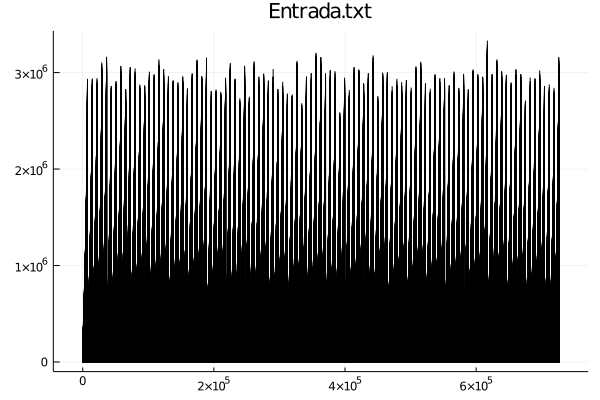

In [8]:
df = DataFrame(entrada_vetorizada)
plot(
        [1:1:size(df, 1);],
        df[!, 4],
        seriestype = :bar,
        label = false,
        title = "Entrada.txt",
        fmt = :png
    )

# b) 
Explicar qual das duas maneiras de armazenamento dos dados é mais eficiente, em relação ao consumo de memória, tanto em termos assintóticos quanto em termos de absolutos. (Data de entrega: 18/06) (0,5 ponto)

In [9]:
"""
O número de posições da entrada vetorizada é 4*m*n*(n+1)/2, onde 4 é o número de dados por contrato 
e o restante da expressão representa o número de linhas do arquivo. 
A estrutura é densa, todas as posições são ocupadas, pois todos os dados do contrato são guardados nessa estrutura.  
Assintóticamente, a complexida de espaço é: Θ(2mn(n+1)) -> Θ(mn²)
""" 
n_posicoes_entrada_vetorizada = 4*length(entrada_vetorizada) 
#print(n_posicoes_entrada_vetorizada)

"""
A entrada matricial é um vetor de 3 dimensões, onde cada dimensão é representada pela empresa,
mes_inicial e mes_final do contrato, e apenas o valor do contrato é guardado nessa estrutura.

entrada_matricial[empresa, mes_inicial, mes_final] = valor

entrada_matricial[100, 120, 120]

A estrutura é esparsa, pois reserva espaços para contratos que não existem. No total são reservadas
m*n^2 posições de memória.
Assintóticamente, a complexida de espaço é: Θ(mn²)
""" 

n_posicoes_entrada_matricial = length(entrada_matricial)


1440000

# c) 
Implementar o método de ordenação Insertion Sort para ordenar o vetor de objetos do tipo contrato. Criar um clone do vetor (simplesmente para não alterar a organização original dos dados) e aplicar o método de ordenação, exibindo ao final o tempo total de execução da ordenação. (Data de entrega: 16/06) (1,0 ponto)


In [10]:
tempo_insertion_sort_1 = @time begin ordenado_insertion_sort = Ordenacao.insertionsort(entrada_vetorizada); end
print("Está ordenado? ", issorted(DataFrame(ordenado_insertion_sort)[!, 4]) ? "sim" : "não")
print("")

474.622356 seconds (2 allocations: 22.156 MiB)
Está ordenado? sim

# d) 
Apresentar a complexidade da função descrita no item anterior, fazendo uso de notação assintótica e tendo como parâmetros somente a quantidade n de meses e a quantidade m de fornecedores. (Data de entrega: 18/06) (0,5 ponto)


pior caso: **Θ(m²n⁴)**, pois o número de linhas do arquivo é função do número de empresas (m) e do número de meses (n)

melhor caso: **Θ(mn²)**

# e)
Implementar o método de ordenação **Mergesort** para ordenar o vetor de objetos do tipo contrato. Criar um clone do vetor e aplicar o método de ordenação, exibindo ao final o tempo total de execução da ordenação. (Data de entrega: 23/06) (1,0 ponto)


In [18]:
benchmark_mergesort = @benchmark Ordenacao.mergesort($entrada_vetorizada)

BenchmarkTools.Trial: 
  memory estimate:  1.16 GiB
  allocs estimate:  2908539
  --------------
  minimum time:     715.447 ms (15.75% GC)
  median time:      772.091 ms (19.99% GC)
  mean time:        790.254 ms (18.79% GC)
  maximum time:     903.422 ms (20.18% GC)
  --------------
  samples:          7
  evals/sample:     1

In [19]:

print("Está ordenado? ", issorted(DataFrame(Ordenacao.mergesort(entrada_vetorizada))[!, 4]) ? "sim" : "não")

Está ordenado? sim

# f) 
Apresentar a complexidade da função descrita no item anterior, fazendo uso de notação assintótica e tendo como parâmetros somente a quantidade n de meses e a quantidade m de fornecedores. (Data de entrega: 23/06) (0,5 ponto)


In [ ]:
"""
O merge sort é um exemplo de algoritmo de ordenação por comparação do tipo dividir-para-conquistar.  
Sua ideia básica consiste em Dividir (o problema em vários subproblemas e resolver esses subproblemas através da recursividade)  
e Conquistar (após todos os subproblemas terem sido resolvidos ocorre a conquista que é a união das resoluções dos subproblemas).  
A complexida: Θ(mn² lg(mn²)).
""" 

# g)
Implementar o método de ordenação **Heapsort** para ordenar o vetor de objetos do tipo contrato. Criar um clone do vetor e aplicar o método de ordenação, exibindo ao final o tempo total de execução da ordenação. (Data de entrega: 23/06) (1,0 ponto)


In [15]:
benchmark_heapsort =
    @benchmark Ordenacao.heapsort($entrada_vetorizada)

BenchmarkTools.Trial: 
  memory estimate:  30.46 MiB
  allocs estimate:  6
  --------------
  minimum time:     213.844 ms (0.00% GC)
  median time:      228.324 ms (0.00% GC)
  mean time:        231.808 ms (1.44% GC)
  maximum time:     271.114 ms (0.00% GC)
  --------------
  samples:          22
  evals/sample:     1

In [20]:
print("Está ordenado? ", issorted(DataFrame(Ordenacao.heapsort(entrada_vetorizada))[!, 4]) ? "sim" : "não")

Está ordenado? sim

# h)
Apresentar a complexidade da função descrita no item anterior, fazendo uso de notação assintótica e tendo como parâmetros somente a quantidade n de meses e a quantidade m de fornecedores. (Data de entrega: 23/06) (0,5 ponto)


In [ ]:
"""
O algoritmo heapsort é um algoritmo de ordenação generalista, e faz parte da família de algoritmos de ordenação por seleção.  
Tem um desempenho em tempo de execução muito bom em conjuntos ordenados aleatoriamente, tem um uso de memória bem comportado  
e o seu desempenho em pior cenário é praticamente igual ao desempenho em cenário médio. Como o Insertion Sort, mas diferentemente  
do Merge Sort, o Heapsort é um algoritmo do tipo local: apenas um número constante de elementos do array é armazenado fora do  
array de entrada durante a sua execução. Assim, o Heapsort combina os melhores atributos dos dois algoritmos de classificação citados.  
A complexida: Θ(mn² lg(mn²)).
""" 

# i)
Implementar o método de ordenação **Quicksort** para ordenar o vetor de objetos do tipo contrato. Criar um clone do vetor e aplicar o método de ordenação, exibindo ao final o tempo total de execução da ordenação. (Data de entrega: 23/06) (1,0 ponto)


In [17]:
benchmark_quicksort = @benchmark Ordenacao.quicksort($entrada_vetorizada)

BenchmarkTools.Trial: 
  memory estimate:  22.16 MiB
  allocs estimate:  2
  --------------
  minimum time:     117.203 ms (0.00% GC)
  median time:      178.113 ms (0.00% GC)
  mean time:        191.114 ms (1.04% GC)
  maximum time:     319.808 ms (0.00% GC)
  --------------
  samples:          27
  evals/sample:     1

In [21]:
print("Está ordenado? ", issorted(DataFrame(Ordenacao.quicksort(entrada_vetorizada))[!, 4]) ? "sim" : "não")

Está ordenado? sim

# j)
Apresentar a complexidade da função descrita no item anterior, fazendo uso de notação assintótica e tendo como parâmetros somente a quantidade n de meses e a quantidade m de fornecedores. (Data de entrega: 23/06) (0,5 ponto)


In [ ]:
"""
O quicksort adota a estratégia de divisão e conquista. A estratégia consiste em rearranjar as chaves de modo que as chaves  
"menores" precedam as chaves "maiores". Em seguida o quicksort ordena as duas sublistas de chaves menores e maiores
recursivamente até que a lista completa se encontre ordenada.  
Complexida de pior caso: Θ(m²n⁴ lg(m²n⁴)).  
Complexidade de melhor caso: Θ(mn² lg(mn²)). 
""" 

# k)
Baseando-se nas ideias dos algoritmos apresentados, criar um método de ordenação que, entretanto, explore as regras de formação de preços de contratos de um fornecedor (expressas na matriz de contratos), para realizar a ordenação dos contratos pelo valor, exibindo ao final o tempo total de execução da ordenação. (Data de entrega: 25/06) (2,0 pontos)


Foi desenvolvida uma solução que aproveita a ordenação de cada empresa, quando observado em formato de tabela, onde os valores são maiores à medida que se observa as posições superiores à direita (mes inicial = 1 e mes final - 120). Nessa estrutura pode-se considerar cada coluna como um heap max.
Foi criado uma estrutura para manipular cada conjunto de 120 heaps max que formam o conjunto de contratos de cada empresa.
Dessa forma, o vetor é ordenado do fim até o início à medida que se retira as raízes de cada árvore. A cada retirada a estrutura é rearranjada para recolocar o valor máximo de volta no topo. Aproveitando-se da estrutura inicial do arquivo, o reposicionamento é realizado a um custo linear.
A retirada dos valores da estrutura é realizada por outra que abrange as 100 instâncias de heaps  do tipo supracitado, para cada empresa, que escolhe sempre o maior valor entre as raizes das instâncias.

In [24]:
benchmark_ordenacao = @benchmark  Ordenacao.ordenar($entrada_matricial)

BenchmarkTools.Trial: 
  memory estimate:  75.25 MiB
  allocs estimate:  750512
  --------------
  minimum time:     398.933 ms (0.00% GC)
  median time:      474.761 ms (0.00% GC)
  mean time:        481.651 ms (1.57% GC)
  maximum time:     608.596 ms (0.00% GC)
  --------------
  samples:          11
  evals/sample:     1

In [25]:
print("Está ordenado? ", issorted(DataFrame(Ordenacao.ordenar(entrada_matricial))[!, 4]) ? "sim" : "não")

Está ordenado? sim

### Gráfico dos valores ordenados

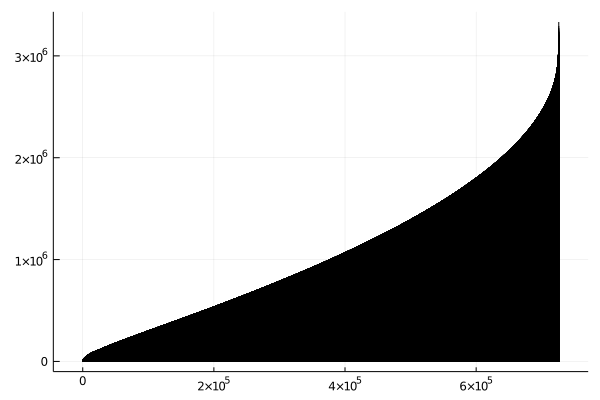

In [26]:
df = DataFrame(Ordenacao.ordenar(entrada_matricial))
plot(
        [1:1:size(df, 1);],
        df[!, 4],
        seriestype = :bar,
        label = false,
        title = "",
        fmt = :png
    )

# l)
Apresentar a complexidade da função descrita no item anterior, fazendo uso de notação assintótica e tendo como parâmetros somente a quantidade n de meses e a quantidade m de fornecedores. (Data de entrega: 25/06) (1,0 ponto)


**Θ(mn)**